In [6]:
import os
import numpy as np
import random
import cv2
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def reduce(img, img_reduction_factor):
  reduced_dimensions=np.array(img.shape, dtype=int)[0:2]/img_reduction_factor
  reduced_dimensions=tuple(np.flip(reduced_dimensions.astype(int)))
  return cv2.resize(img,reduced_dimensions)

def save_img(img, img_dir):
  os.makedirs(os.path.dirname(img_dir), exist_ok=True)
  cv2.imwrite(img_dir,img)

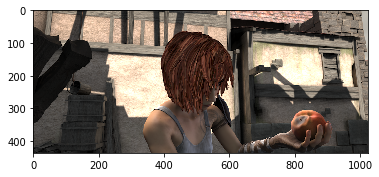

(436, 1024, 3)


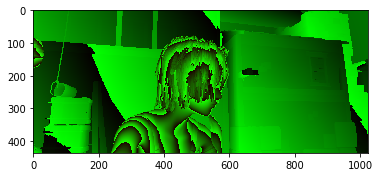

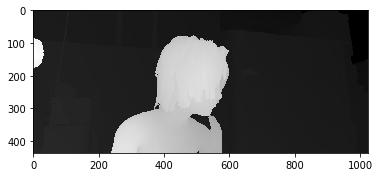

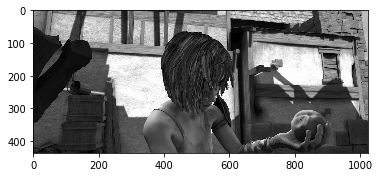

In [7]:
base_dir="/Users/leandro/Documents/MASTER/vision/tp2/SINTEL-stereo/"
left_dir=os.path.join(base_dir, 'training','clean_left')
right_dir=os.path.join(base_dir, 'training','clean_right')
disp_dir=os.path.join(base_dir, 'training','disparities')
theme_dir=os.listdir(right_dir)
train_theme_dir=sorted(theme_dir)
train_images = [os.path.join(sub,file) for sub in train_theme_dir for file in os.listdir(os.path.join(right_dir,sub))]

left_image_path=os.path.join(left_dir,train_images[0])
imgplot = plt.imshow(mpimg.imread(left_image_path))
plt.show()
right_image_path=os.path.join(right_dir,train_images[0])
left_image=cv2.imread(left_image_path,cv2.IMREAD_COLOR)

resized_image_file=os.path.join(base_dir, 'resized','clean_left',train_images[0])
save_img(cv2.cvtColor(reduce(left_image, 1), cv2.COLOR_BGR2GRAY), resized_image_file)

img = cv2.imread(os.path.join(disp_dir,train_images[1]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.show()

plt.imshow(img[:, :, 0] * 4 + img[:, :, 1]/64,cmap=plt.get_cmap('gray'))
plt.show()

plt.imshow(cv2.imread(resized_image_file, cv2.IMREAD_GRAYSCALE),cmap=plt.get_cmap('gray'))
plt.show()

In [2]:
def clean(images, img_reduction_factor=1):
    for img in images:
    
      left_image_path=os.path.join(left_dir,img)
      right_image_path=os.path.join(right_dir,img)
      disp_image_path=os.path.join(disp_dir,img)
    
      left_image=cv2.imread(left_image_path,cv2.IMREAD_COLOR)
      right_image=cv2.imread(right_image_path,cv2.IMREAD_COLOR)
      disp_image=cv2.imread(disp_image_path)
      
      resized_left_image_path=os.path.join(base_dir, 'resized','clean_left',img)
      resized_right_image_path=os.path.join(base_dir, 'resized','clean_right',img)
      resized_disp_image_path=os.path.join(base_dir, 'resized','disparities',img)
    
      save_img(cv2.cvtColor(reduce(left_image, img_reduction_factor), cv2.COLOR_BGR2GRAY), resized_left_image_path)
      save_img(cv2.cvtColor(reduce(right_image, img_reduction_factor), cv2.COLOR_BGR2GRAY), resized_right_image_path)
      save_img(reduce(disp_image[:, :, 2] * 4 + disp_image[:, :, 1]/64, img_reduction_factor), resized_disp_image_path)


clean(train_images, img_reduction_factor=1)   

NameError: name 'train_images' is not defined

In [8]:
def generate_patches(dir, size, theme_paths, ks):
    left = math.floor(ks/2)
    right = math.ceil(ks/2)
    DATASET_NEG_LOW = 10
    DATASET_NEG_HIGH = 20
    i = 0
    while i < size:
      randomNumber = random.randint(0,len(theme_paths)-1)
      selected_image = theme_paths[randomNumber]
      left_image_path=os.path.join(base_dir, 'resized','clean_left', selected_image)
      right_image_path=os.path.join(base_dir, 'resized','clean_right', selected_image)
      disp_image_path=os.path.join(base_dir, 'resized','disparities', selected_image) 
      
      left_image = cv2.imread(left_image_path,cv2.IMREAD_GRAYSCALE)
      right_image = cv2.imread(right_image_path,cv2.IMREAD_GRAYSCALE)
      disp_image = cv2.imread(disp_image_path,cv2.IMREAD_GRAYSCALE)
      
      dimension = left_image.shape
      
      not_valid_patch=True
      while not_valid_patch:
        o_pos = 0 #random.randint(-1,1)
        o_neg = random.choice([-1,1]) * random.randint(DATASET_NEG_LOW, DATASET_NEG_HIGH)
        y = random.randint(left,dimension[0]-right)
        x = random.randint(left,dimension[1]-right)
        
        x_left_patch_1=x-left
        x_left_patch_2=x+right
        y_left_patch_1=y-left
        y_left_patch_2=y+right

        disp = disp_image[y][x]
        if disp == 0:
          continue
        
        x_right_pos_patch_1=x-disp+o_pos-left
        x_right_pos_patch_2=x-disp+o_pos+right
        y_right_pos_patch_1=y-left
        y_right_pos_patch_2=y+right
    
        x_right_neg_patch_1=x-disp+o_neg-left
        x_right_neg_patch_2=x-disp+o_neg+right
        y_right_neg_patch_1=y-left
        y_right_neg_patch_2=y+right
    
        all_x = [x_left_patch_1, x_left_patch_2, x_right_pos_patch_1, x_right_pos_patch_2, x_right_neg_patch_1, x_right_neg_patch_2]
        x_max = max(all_x)
        x_min = min(all_x)
    
        if x_min > 0 and y_left_patch_1 > 0 and x_max < dimension[1] and y_left_patch_2 < dimension[0]:
          left_patch_image = left_image[y_left_patch_1:y_left_patch_2,x_left_patch_1:x_left_patch_2]
          right_pos_patch_image = right_image[y_right_pos_patch_1:y_right_pos_patch_2, x_right_pos_patch_1:x_right_pos_patch_2]
          right_neg_patch_image = right_image[y_right_neg_patch_1:y_right_neg_patch_2,x_right_neg_patch_1:x_right_neg_patch_2]
          
          if np.sum(left_patch_image) == 0 or np.sum(right_pos_patch_image) == 0 or np.sum(right_neg_patch_image) == 0 \
                  or np.sum(left_patch_image)-np.mean(left_patch_image) == 0 \
                  or np.sum(right_pos_patch_image)-right_pos_patch_image.mean() == 0 \
                  or np.sum(right_neg_patch_image)-right_neg_patch_image.mean() == 0 \
                  or left_patch_image.std() == 0 \
                  or right_pos_patch_image.std() == 0 \
                  or right_neg_patch_image.std() == 0:
            continue
          save_img(left_patch_image,os.path.join(base_dir, 'patches', dir, f'{i}_left.png'))
          save_img(right_pos_patch_image,os.path.join(base_dir, 'patches', dir, f'{i}_right_pos.png'))
          save_img(right_neg_patch_image,os.path.join(base_dir, 'patches', dir, f'{i}_right_neg.png'))
          i+=1
          not_valid_patch=False


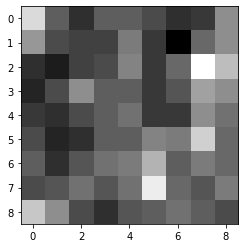

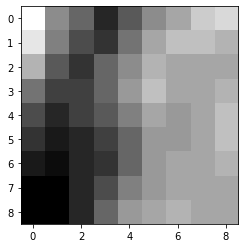

In [10]:
img = cv2.imread(os.path.join(base_dir, 'patches','train/0_left.png'),cv2.IMREAD_GRAYSCALE)

plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()
img = cv2.imread(os.path.join(base_dir, 'patches','train/0_right_pos.png'),cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()

255
